In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/intellihackstockdata/question4-stock-data (1).csv


In [18]:
import gc
gc.collect()
import warnings
warnings.filterwarnings('ignore')

In [19]:
file_path = "/kaggle/input/intellihackstockdata/question4-stock-data (1).csv"
data_ori = pd.read_csv(file_path,index_col='Unnamed: 0')
data_ori

,Date,Adj Close,Close,High,Low,Open,Volume
0,1980-03-17,2.296798,3.291227,3.344743,3.291227,0.000000,41109.0
1,1980-03-18,2.306134,3.304606,3.358122,3.304606,0.000000,9343.0
2,1980-03-19,2.306134,3.304606,3.304606,3.304606,3.304606,0.0
3,1980-03-20,2.306134,3.304606,3.358122,3.304606,0.000000,10277.0
4,1980-03-21,2.362154,3.384880,3.438396,3.384880,0.000000,8409.0
...,...,...,...,...,...,...,...
11286,2024-12-20,178.169998,178.169998,179.919998,175.839996,175.839996,425700.0
11287,2024-12-23,180.449997,180.449997,180.619995,177.970001,179.119995,422700.0
11288,2024-12-24,181.429993,181.429993,181.720001,180.830002,181.000000,168600.0
11289,2024-12-26,197.360001,197.360001,198.000000,193.130005,195.970001,1281200.0


In [20]:
data = data_ori.copy()

In [21]:
data.Date = pd.to_datetime(data.Date)
data_ori.Date = pd.to_datetime(data_ori.Date)

In [124]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 11291 entries, 0 to 11290
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       11181 non-null  datetime64[ns]
 1   Adj Close  11198 non-null  float64       
 2   Close      11174 non-null  float64       
 3   High       11196 non-null  float64       
 4   Low        11164 non-null  float64       
 5   Open       11188 non-null  float64       
 6   Volume     11146 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 705.7 KB


In [129]:
data.isnull().sum()

Date           0
Adj Close     93
Close          0
High          92
Low          126
Open         100
Volume       141
dtype: int64

# Data Cleaning

In [37]:
data[data.isnull().any(axis=1)]

,Date,Adj Close,Close,High,Low,Open,Volume
10,1980-03-31,2.315470,3.317985,NaN,3.317985,0.000000,1869.0
20,1980-04-15,2.427510,3.478533,3.532049,NaN,0.000000,1869.0
37,1980-05-08,2.642250,3.786249,3.839765,3.786249,NaN,7474.0
40,1980-05-13,2.707607,3.879902,3.933418,3.879902,0.000000,NaN
51,1980-05-29,2.763627,3.960176,3.960176,NaN,3.960176,0.0
...,...,...,...,...,...,...,...
11223,2024-09-23,185.399994,NaN,185.809998,184.130005,184.750000,357800.0
11238,2024-10-14,175.100006,NaN,175.389999,174.080002,174.220001,316100.0
11243,2024-10-21,NaN,169.169998,170.259995,168.660004,170.100006,420200.0
11256,NaT,178.449997,178.449997,179.679993,177.259995,179.000000,638000.0


In [38]:
data

,Date,Adj Close,Close,High,Low,Open,Volume
0,1980-03-17,2.296798,3.291227,3.344743,3.291227,0.000000,41109.0
1,1980-03-18,2.306134,3.304606,3.358122,3.304606,0.000000,9343.0
2,1980-03-19,2.306134,3.304606,3.304606,3.304606,3.304606,0.0
3,1980-03-20,2.306134,3.304606,3.358122,3.304606,0.000000,10277.0
4,1980-03-21,2.362154,3.384880,3.438396,3.384880,0.000000,8409.0
...,...,...,...,...,...,...,...
11286,2024-12-20,178.169998,178.169998,179.919998,175.839996,175.839996,425700.0
11287,2024-12-23,180.449997,180.449997,180.619995,177.970001,179.119995,422700.0
11288,2024-12-24,181.429993,181.429993,181.720001,180.830002,181.000000,168600.0
11289,2024-12-26,197.360001,197.360001,198.000000,193.130005,195.970001,1281200.0


# Handling Null values

Dropped the rows having null values in 'Date' and 'Close', since we are predicting 'Close' values.

In [22]:
print("Before dropping",data.shape)
data.dropna(subset=['Date', 'Close'], inplace=True)
print("After dropping:",data.shape)

Before dropping (11291, 7)
After dropping: (11065, 7)


## For Random Forest Model 

In [23]:
data_random = data.copy()

In [24]:
# Forward fill for OHLC columns
data_random[['Open', 'High', 'Low', 'Close', 'Adj Close']] = data_random[['Open', 'High', 'Low', 'Close', 'Adj Close']].ffill()

# Rolling median for Volume
data_random['Volume'] = data_random['Volume'].fillna(data_random['Volume'].rolling(7, min_periods=1).median())

# Linear interpolation for any remaining NaNs
data_random.interpolate(method='linear', inplace=True)

# Verify no missing values remain
print(data_random.isnull().sum())

Date         0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64


## XG Boost can handle null values 

In [28]:
data_random = data_random.dropna(subset=['Target'])


# Feature Engineering

In [25]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Feature Engineering
data['DayOfWeek'] = data['Date'].dt.dayofweek
data['Month'] = data['Date'].dt.month
data['Lag_1'] = data['Close'].shift(1)
data['Lag_5'] = data['Close'].shift(5)
data['Rolling_Mean_5'] = data['Close'].rolling(window=5).mean()
data['Rolling_Std_5'] = data['Close'].rolling(window=5).std()

# Create the target variable (next day's closing price)
data['Target'] = data['Close'].shift(-5)



In [26]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Feature Engineering
data_random['DayOfWeek'] = data_random['Date'].dt.dayofweek
data_random['Month'] = data_random['Date'].dt.month
data_random['Lag_1'] = data_random['Close'].shift(1)
data_random['Lag_5'] = data_random['Close'].shift(5)
data_random['Rolling_Mean_5'] = data_random['Close'].rolling(window=5).mean()
data_random['Rolling_Std_5'] = data_random['Close'].rolling(window=5).std()

# Create the target variable (next day's closing price)
data_random['Target'] = data_random['Close'].shift(-5)


In [29]:
print(data_random.isnull().sum())

Date              0
Adj Close         0
Close             0
High              0
Low               0
Open              0
Volume            0
DayOfWeek         0
Month             0
Lag_1             1
Lag_5             5
Rolling_Mean_5    4
Rolling_Std_5     4
Target            0
dtype: int64


In [30]:
data_random.fillna(-1,inplace=True)

# Visualisation

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data.sort_values("Date", inplace=True)
data.set_index("Date", inplace=True)


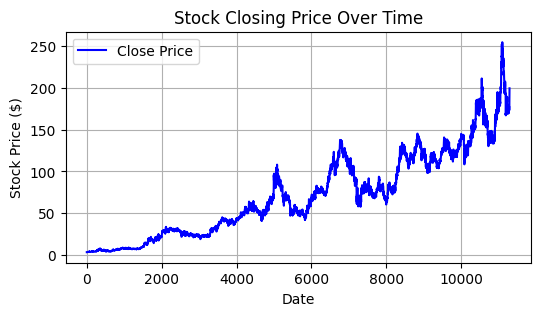

In [130]:
plt.figure(figsize=(6, 3))
plt.plot(data.index, data["Close"], label="Close Price", color='blue')
plt.xlabel("Date")
plt.ylabel("Stock Price ($)")
plt.title("Stock Closing Price Over Time")
plt.legend()
plt.grid()
plt.show()


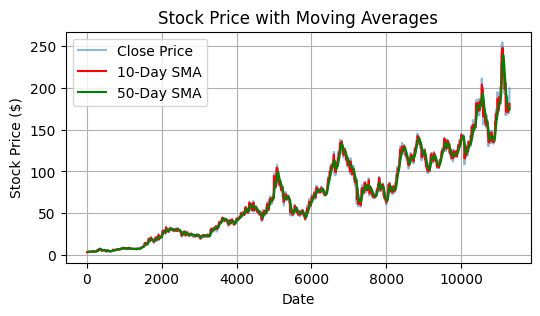

In [131]:
data["SMA_10"] = data["Close"].rolling(window=10).mean()  # 10-day SMA
data["SMA_50"] = data["Close"].rolling(window=50).mean()  # 50-day SMA

plt.figure(figsize=(6,3))
plt.plot(data.index, data["Close"], label="Close Price", alpha=0.5)
plt.plot(data.index, data["SMA_10"], label="10-Day SMA", color='red')
plt.plot(data.index, data["SMA_50"], label="50-Day SMA", color='green')
plt.xlabel("Date")
plt.ylabel("Stock Price ($)")
plt.title("Stock Price with Moving Averages")
plt.legend()
plt.grid()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


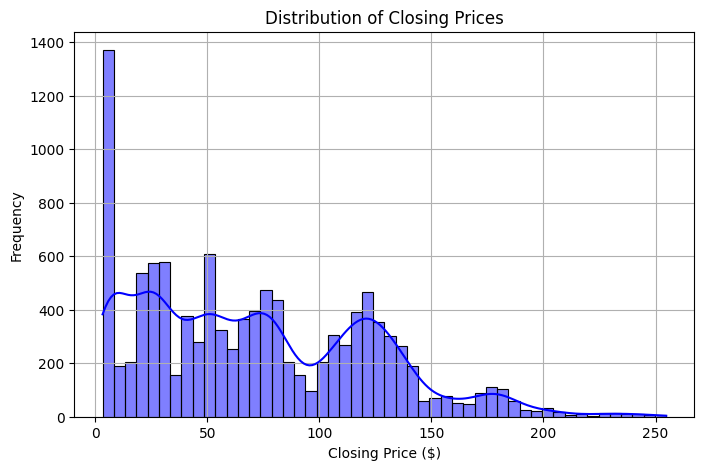

In [12]:
plt.figure(figsize=(8, 5))
sns.histplot(data["Close"], bins=50, kde=True, color='blue')
plt.xlabel("Closing Price ($)")
plt.ylabel("Frequency")
plt.title("Distribution of Closing Prices")
plt.grid()
plt.show()


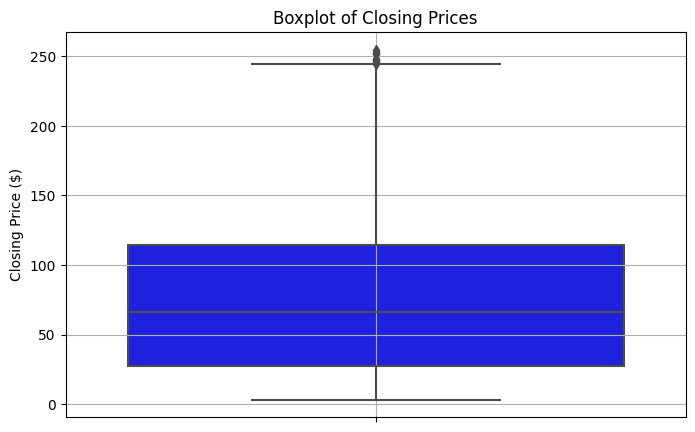

In [13]:
plt.figure(figsize=(8, 5))
sns.boxplot(y=data["Close"], color='blue')
plt.ylabel("Closing Price ($)")
plt.title("Boxplot of Closing Prices")
plt.grid()
plt.show()


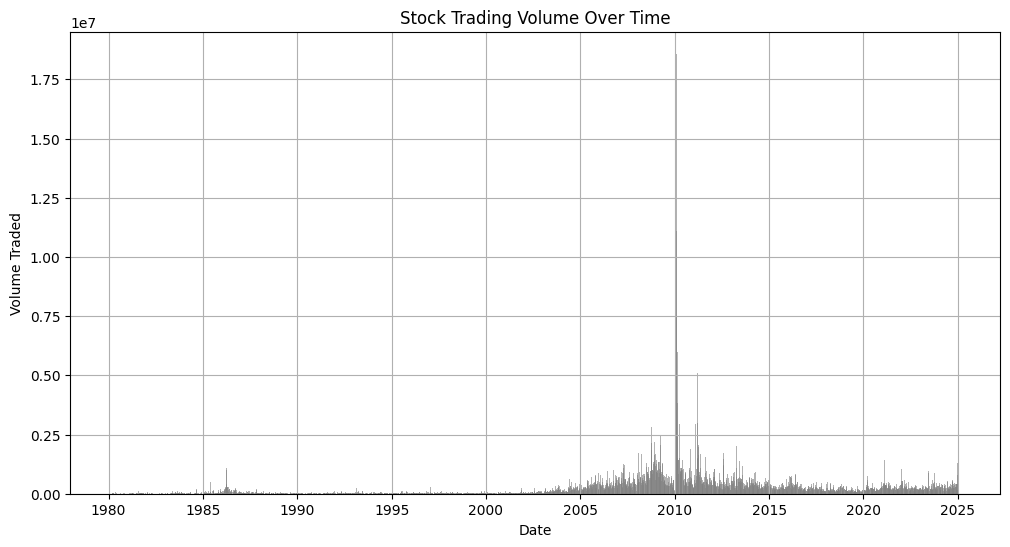

In [15]:
plt.figure(figsize=(12, 6))
plt.bar(data.index, data["Volume"], width=5, color='gray', alpha=0.6)
plt.xlabel("Date")
plt.ylabel("Volume Traded")
plt.title("Stock Trading Volume Over Time")
plt.grid()
plt.show()


In [65]:
data_ori.Date = pd.to_datetime(data_ori['Date'])

In [69]:
data_ori.columns

Index(['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

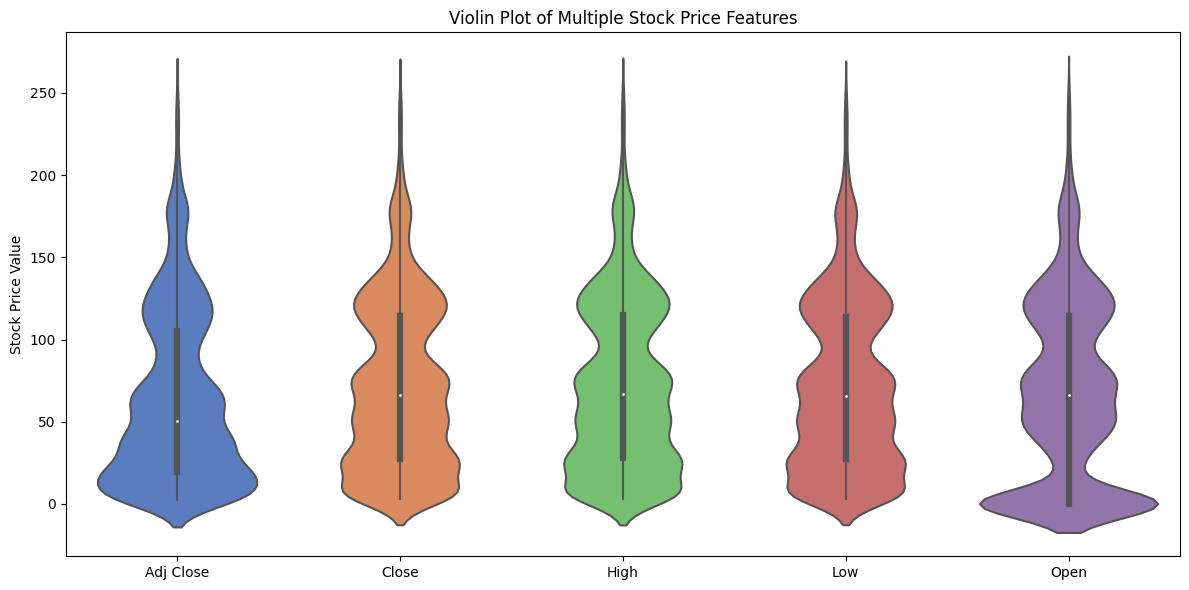

In [72]:
# Plotting the distribution of multiple features (e.g., 'Close', 'High', 'Low')
plt.figure(figsize=(12, 6))
sns.violinplot(data=data[[ 'Adj Close', 'Close', 'High', 'Low', 'Open']], palette="muted")

# Title and labels
plt.title('Violin Plot of Multiple Stock Price Features')
plt.ylabel('Stock Price Value')

# Display the plot
plt.tight_layout()
plt.show()


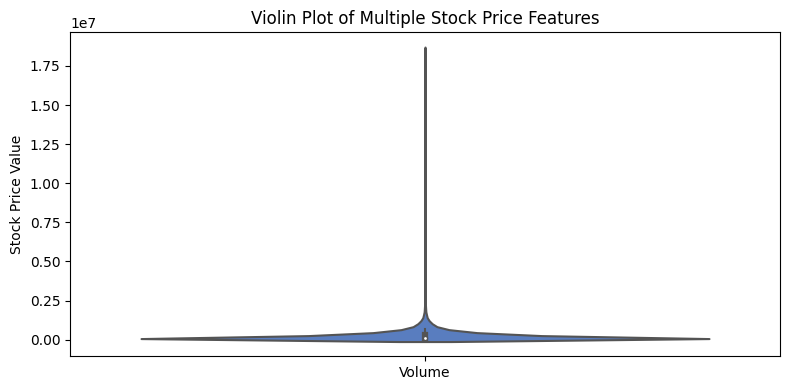

In [74]:
# Plotting the distribution of multiple features (e.g., 'Close', 'High', 'Low')
plt.figure(figsize=(8, 4))
sns.violinplot(data=data[[  'Volume']], palette="muted")

# Title and labels
plt.title('Violin Plot of Multiple Stock Price Features')
plt.ylabel('Stock Price Value')

# Display the plot
plt.tight_layout()
plt.show()


In [98]:
data.columns

Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume', 'DayOfWeek',
       'Month', 'Lag_1', 'Lag_5', 'Rolling_Mean_5', 'Rolling_Std_5', 'Target'],
      dtype='object')

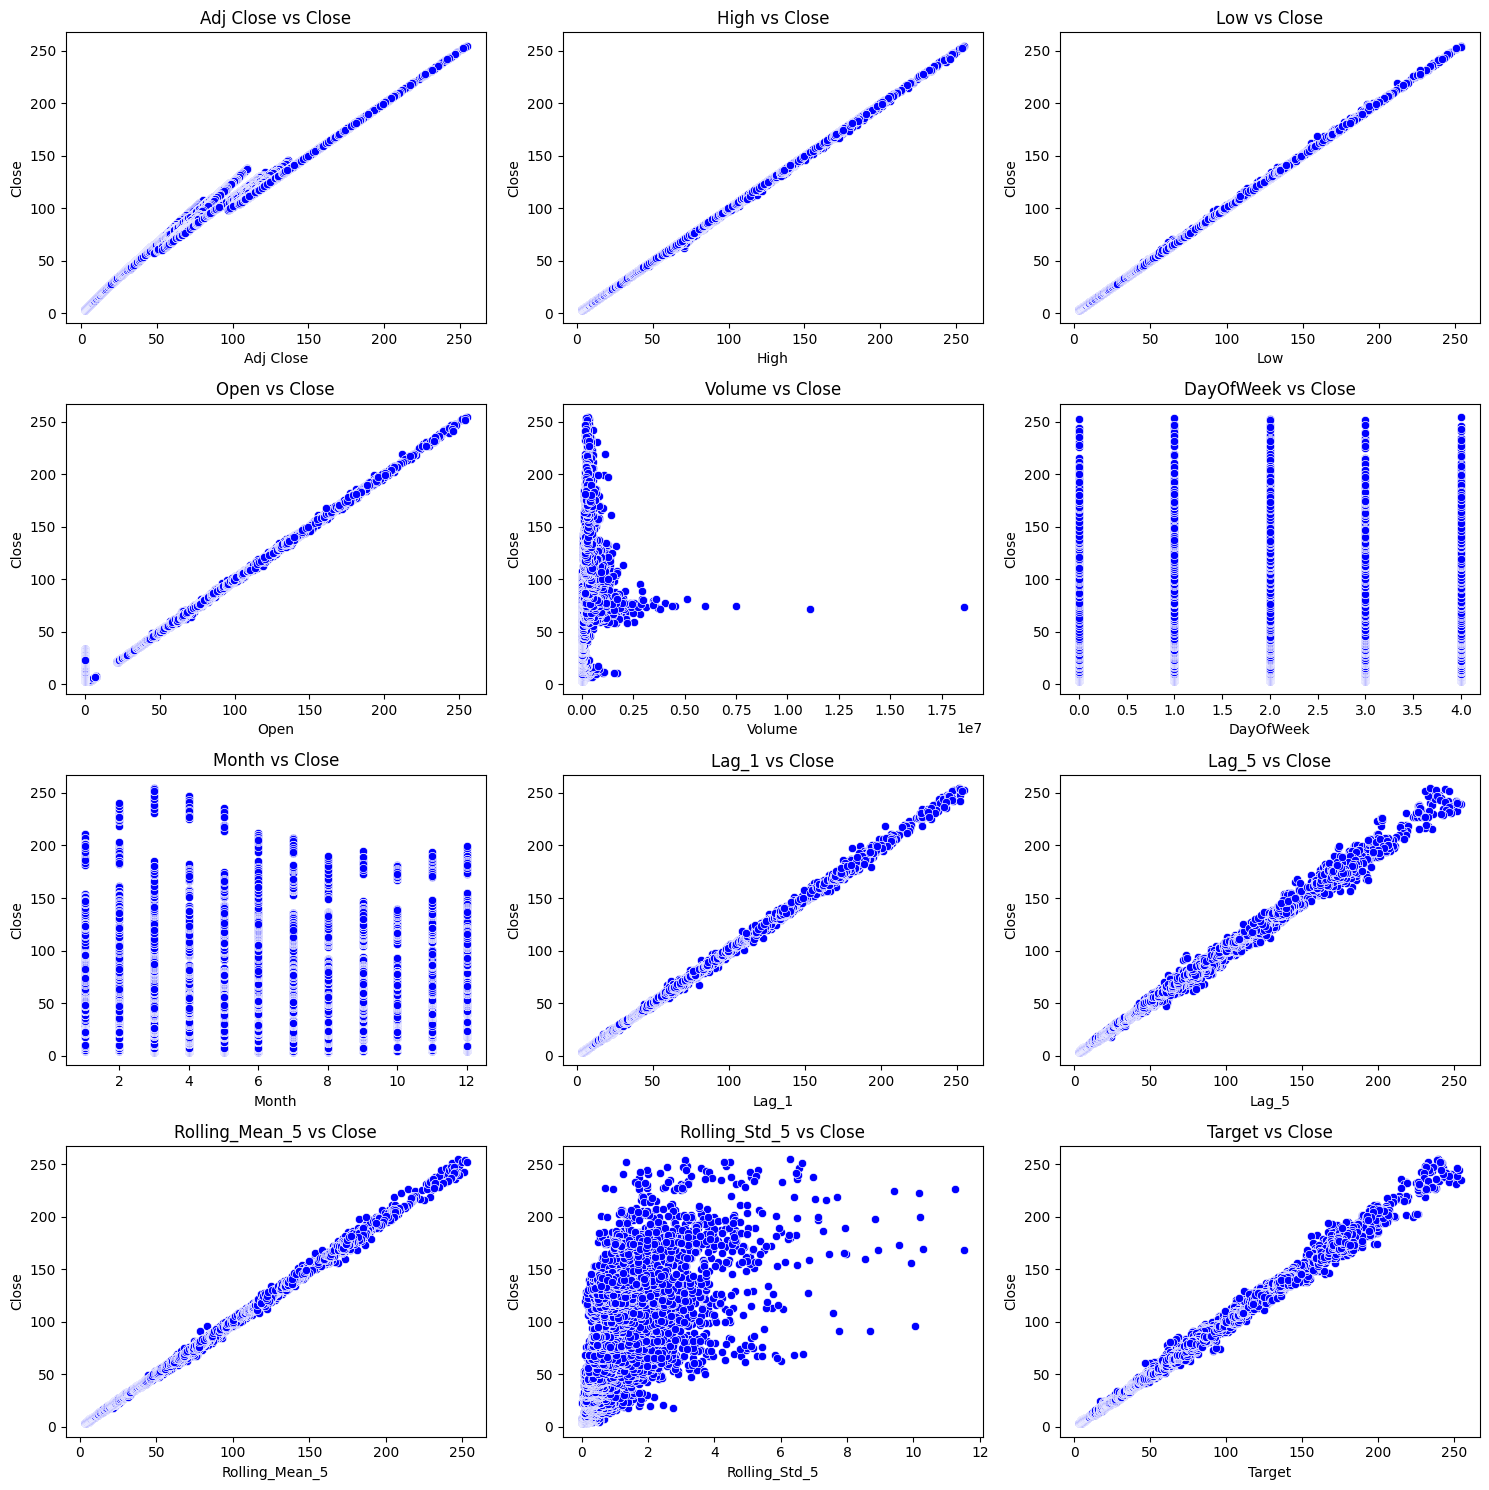

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of feature columns (including the newly added features)
feature_columns = ['Adj Close', 'High', 'Low', 'Open', 'Volume', 'DayOfWeek',
                   'Month', 'Lag_1', 'Lag_5', 'Rolling_Mean_5', 'Rolling_Std_5', 'Target']

# Create subplots for each feature vs 'Close'
plt.figure(figsize=(15, 15))  # Adjusted figsize for better layout

# Loop through each feature column and plot the scatter plot
for i, feature in enumerate(feature_columns, 1):
    plt.subplot(4, 3, i)  # 4 rows, 3 columns of subplots
    sns.scatterplot(x=data[feature], y=data['Close'], color='b')
    plt.title(f'{feature} vs Close')
    plt.xlabel(feature)
    plt.ylabel('Close')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


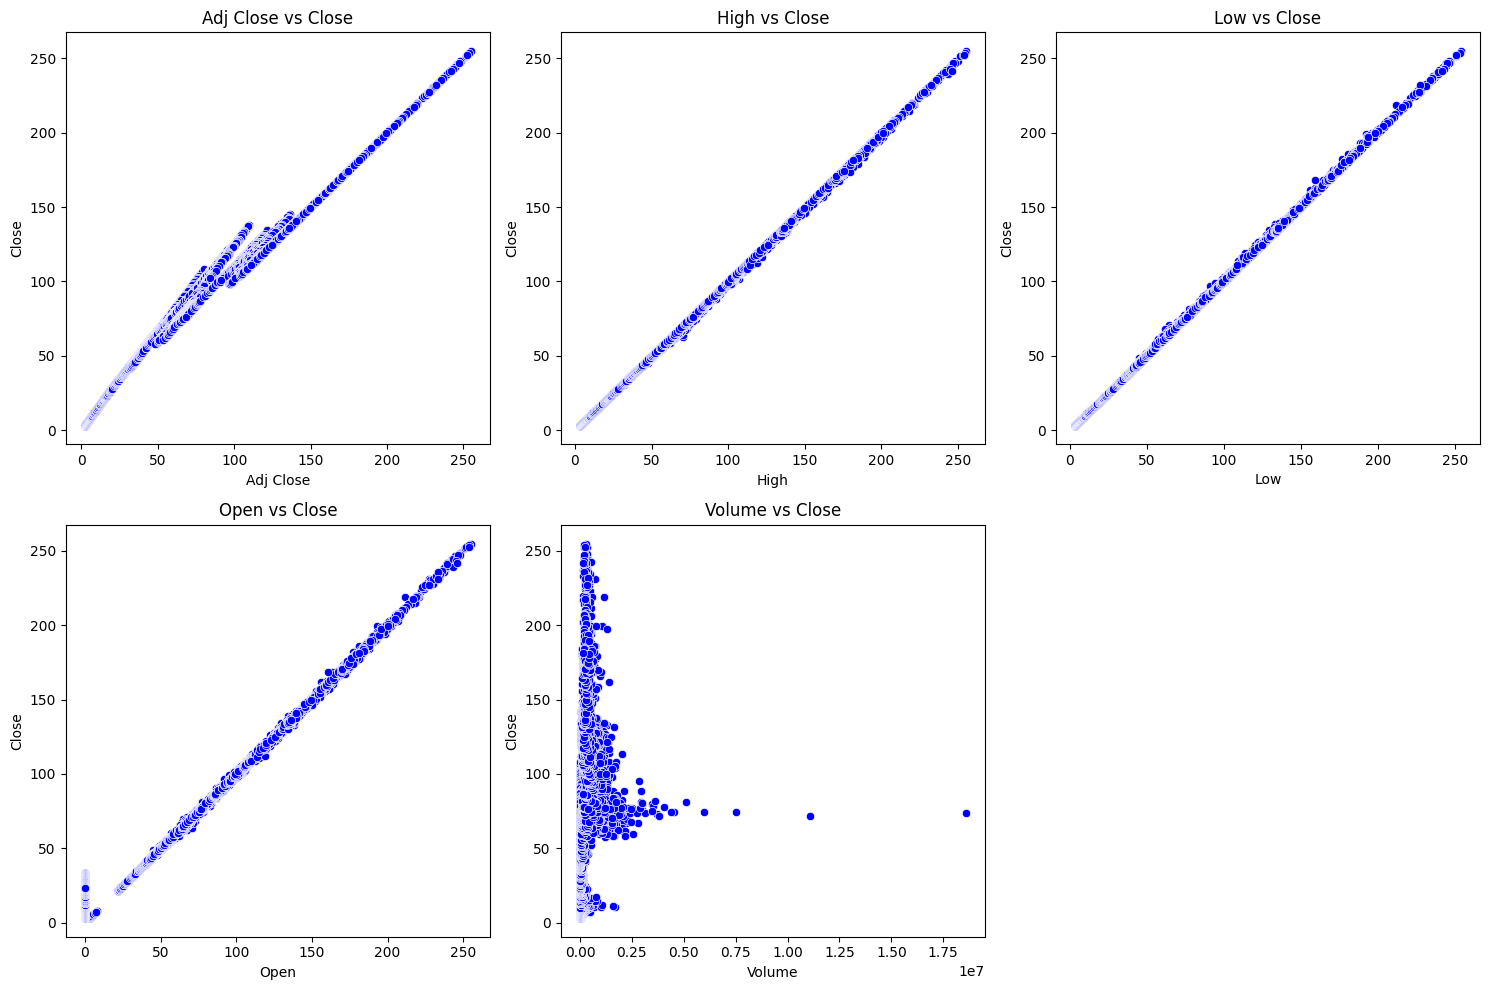

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of feature columns (excluding 'Close')
feature_columns = ['Adj Close', 'High', 'Low', 'Open', 'Volume']

# Create subplots for each feature vs 'Close'
plt.figure(figsize=(15, 10))

# Loop through each feature column and plot the scatter plot
for i, feature in enumerate(feature_columns, 1):
    plt.subplot(2, 3, i)  # 2 rows, 3 columns of subplots
    sns.scatterplot(x=data[feature], y=data['Close'], color='b')
    plt.title(f'{feature} vs Close')
    plt.xlabel(feature)
    plt.ylabel('Close')

# Adjust layout
plt.tight_layout()
plt.show()


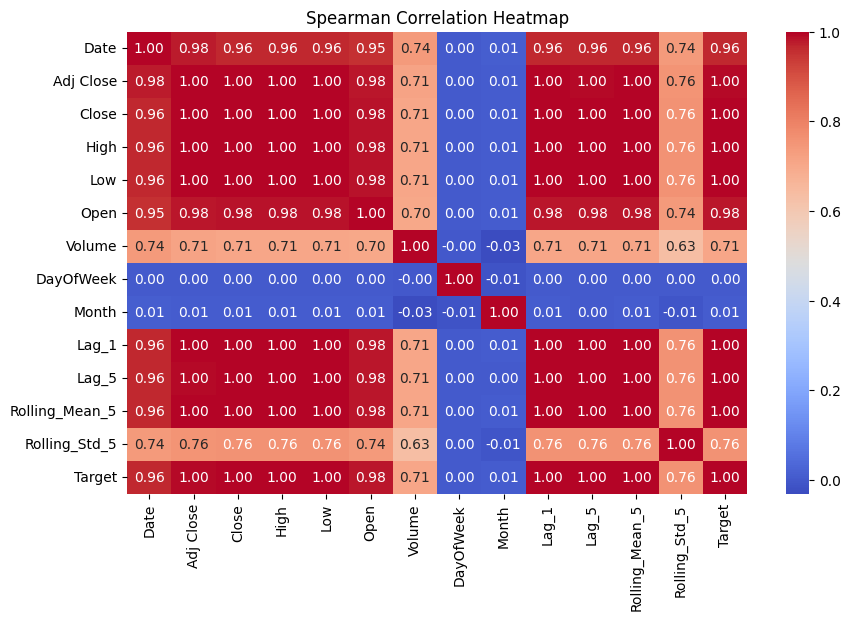

In [149]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(method='spearman'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Spearman Correlation Heatmap")
plt.show()


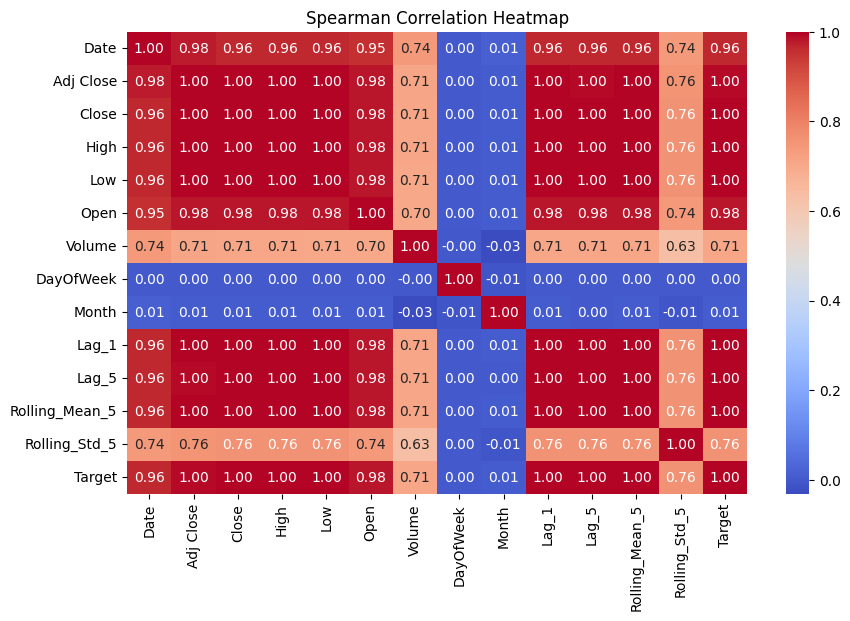

In [148]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(data_random.corr(method='spearman'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Spearman Correlation Heatmap")
plt.show()


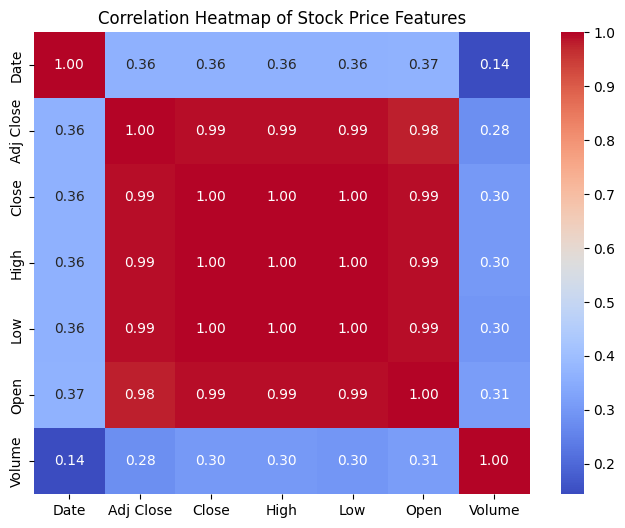

In [66]:
plt.figure(figsize=(8, 6))
sns.heatmap(data_ori.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Stock Price Features")
plt.show()


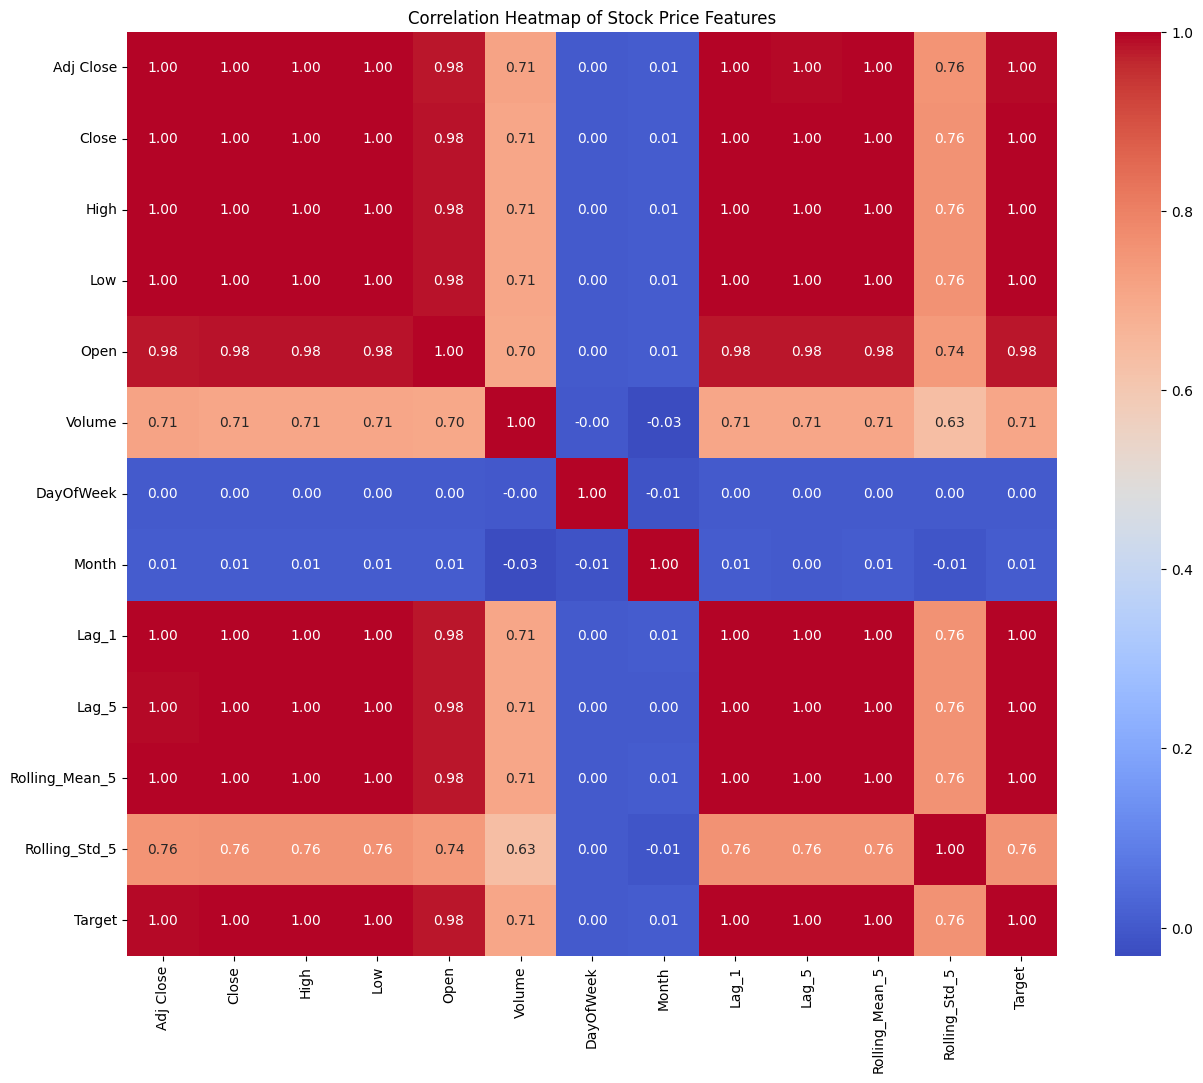

In [102]:
plt.figure(figsize=(15, 12))
sns.heatmap(data.corr(method='spearman'), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Stock Price Features")
plt.show()


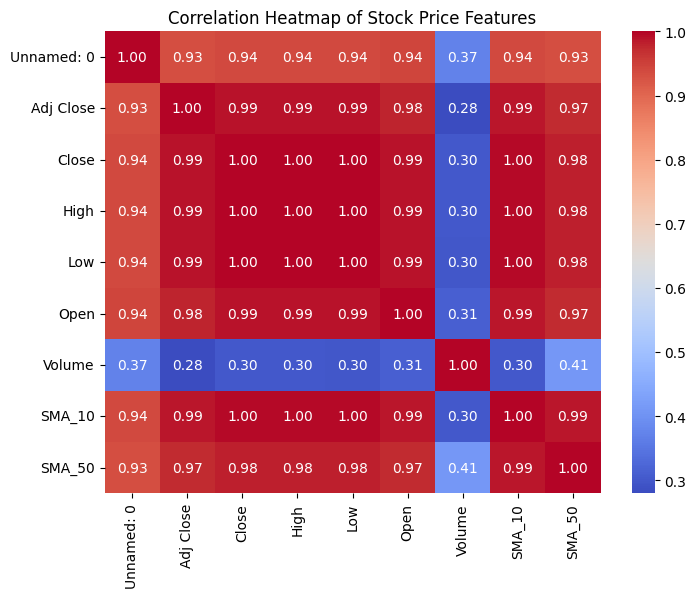

In [17]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Stock Price Features")
plt.show()


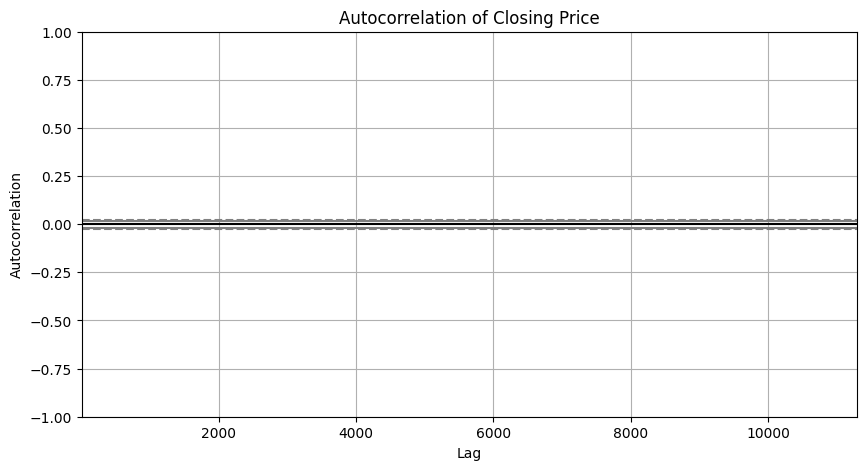

In [19]:
from pandas.plotting import autocorrelation_plot

plt.figure(figsize=(10, 5))
autocorrelation_plot(data["Close"])
plt.title("Autocorrelation of Closing Price")
plt.show()


# XG Boost

#### XGBoost with timeseries split and PCA applied with 11 components

Mean Absolute Error (MAE): 21.76152423044341
Root Mean Squared Error (RMSE): 33.21828742624075
Predicted 'Close' prices for the next 5 days: [111.99351, 111.99351, 111.99351, 111.99351, 111.99351]


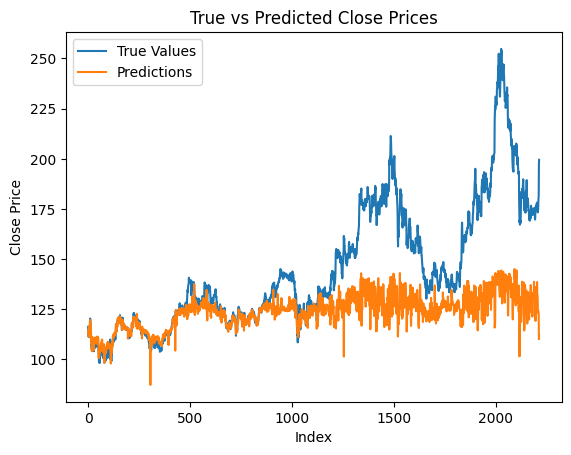

In [52]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import xgboost as xgb

# Assuming 'data' is your DataFrame, already sorted by date (oldest to newest)

# Select features and target
features = ['Adj Close', 'High', 'Low', 'Open', 'Volume', 'DayOfWeek', 'Month',
            'Lag_1', 'Lag_5', 'Rolling_Mean_5', 'Rolling_Std_5', 'Target']
target = 'Close'

X = data[features]
y = data[target]

# Step 1: Scaling the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Apply PCA
pca = PCA(n_components=11)  # Adjust the number of components if needed
X_pca = pca.fit_transform(X_scaled)

# Step 3: Time-Series Split (80% train, 20% test)
split_index = int(len(X_pca) * 0.8)  # 80% for training
X_train, X_test = X_pca[:split_index], X_pca[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Step 4: Train XGBoost Model
model = xgb.XGBRegressor(n_estimators=500, max_depth=10, learning_rate=0.05, random_state=42)
model.fit(X_train, y_train)

# Step 5: Make Predictions for the Test Set
y_pred = model.predict(X_test)

# Step 6: Evaluate the Model Performance
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Step 7: Predicting for the Next 5 Days
X_latest = X_pca[-1].reshape(1, -1)  # Use the last available data point
future_predictions = []

for i in range(5):
    prediction = model.predict(X_latest)
    future_predictions.append(prediction[0])
    
    # Simulate updating features for the next day
    X_latest[0, 0] = prediction  # You may need a better updating strategy

print("Predicted 'Close' prices for the next 5 days:", future_predictions)

# Optional: Plotting the results
plt.plot(range(len(y_test)), y_test, label="True Values")
plt.plot(range(len(y_test)), y_pred, label="Predictions")
plt.title("True vs Predicted Close Prices")
plt.xlabel("Index")
plt.ylabel("Close Price")
plt.legend()
plt.show()


### XGBoost with timeseries split and without PCA

Mean Absolute Error (MAE): 14.022909338072912
Root Mean Squared Error (RMSE): 26.244445537087085
Predicted 'Close' prices for the next 5 days: [125.38102, 125.38102, 125.38102, 125.38102, 125.38102]


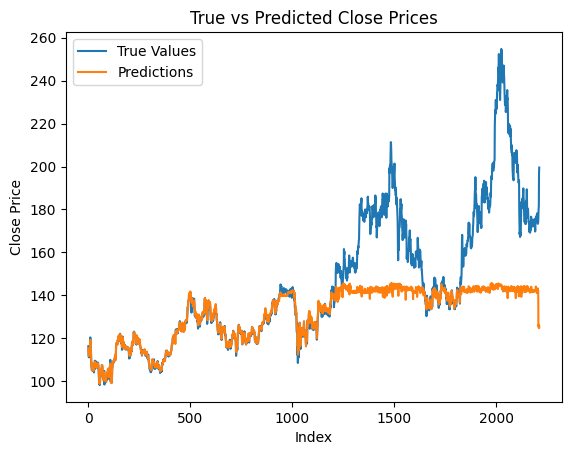

In [46]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame, already sorted by date (oldest to newest)

# Select features and target
features = ['Adj Close', 'High', 'Low', 'Open', 'Volume', 'DayOfWeek', 'Month',
            'Lag_1', 'Lag_5', 'Rolling_Mean_5', 'Rolling_Std_5', 'Target']
target = 'Close'

X = data[features]
y = data[target]

# Step 1: Scaling the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Time-Series Split (80% train, 20% test)
split_index = int(len(X_scaled) * 0.8)  # 80% for training
X_train, X_test = X_scaled[:split_index], X_scaled[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Step 3: Train XGBoost Model
model = XGBRegressor(n_estimators=1000, learning_rate=0.05, max_depth=3)
model.fit(X_train, y_train)

# Step 4: Make Predictions for the Test Set
y_pred = model.predict(X_test)

# Step 5: Evaluate the Model Performance
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Step 6: Predicting for the Next 5 Days
X_latest = X_scaled[-1].reshape(1, -1)  # Use the last available data point
future_predictions = []

for i in range(5):
    prediction = model.predict(X_latest)
    future_predictions.append(prediction[0])
    
    # Simulate updating features for the next day
    X_latest[0, 0] = prediction  # You may need a better updating strategy

print("Predicted 'Close' prices for the next 5 days:", future_predictions)

# Optional: Plotting the results
plt.plot(range(len(y_test)), y_test, label="True Values")
plt.plot(range(len(y_test)), y_pred, label="Predictions")
plt.title("True vs Predicted Close Prices")
plt.xlabel("Index")
plt.ylabel("Close Price")
plt.legend()
plt.show()


Mean Absolute Error: 14.354304897133328
Root Mean Squared Error: 26.7368630962755


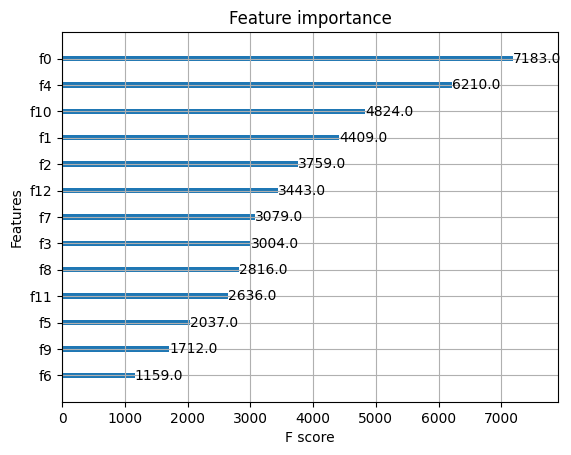

In [202]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and 'Close' is the target column

# Drop datetime columns if necessary
X = data.drop('Close', axis=1)

# If there's a 'Date' column, drop it or convert it to numerical features
if 'Date' in X.columns:
    X['Date'] = pd.to_datetime(X['Date'])  # Ensure the column is in datetime format
    X['DayOfYear'] = X['Date'].dt.dayofyear
    X['Month'] = X['Date'].dt.month
    X['DayOfWeek'] = X['Date'].dt.dayofweek
    X = X.drop(columns=['Date'])

# Extract the target
y = data['Close']

# Split data into train and test sets (respecting time order)
train_size = int(len(data) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train XGBoost model
model = XGBRegressor(n_estimators=1000, learning_rate=0.05, max_depth=6, random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')

# Feature importance plot
import xgboost as xgb
xgb.plot_importance(model)
plt.show()


In [204]:
# import numpy as np
# import pandas as pd
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_absolute_error, mean_squared_error
# from xgboost import XGBRegressor
# import matplotlib.pyplot as plt

# # Assuming 'data' is your DataFrame and 'Close' is the target column

# # Drop datetime columns if necessary (if applicable)
# X = data_random.drop('Close', axis=1)

# # If there's a 'Date' column, drop it or convert it to numerical features
# if 'Date' in X.columns:
#     X['Date'] = pd.to_datetime(X['Date'])  # Ensure the column is in datetime format
#     X['DayOfYear'] = X['Date'].dt.dayofyear
#     X['Month'] = X['Date'].dt.month
#     X['DayOfWeek'] = X['Date'].dt.dayofweek
#     X = X.drop(columns=['Date'])

# # Extract the target
# y = data['Close']

# # Split data into train and test sets (respecting time order)
# train_size = int(len(data_random) * 0.8)
# X_train, X_test = X[:train_size], X[train_size:]
# y_train, y_test = y[:train_size], y[train_size:]

# # Feature Scaling (PCA is sensitive to the scale of data)
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Apply PCA to reduce dimensionality
# pca = PCA(n_components=0.95)  # Retaining 95% of the variance, you can adjust this
# X_train_pca = pca.fit_transform(X_train_scaled)
# X_test_pca = pca.transform(X_test_scaled)

# # Train XGBoost model using PCA-transformed features
# model = XGBRegressor(n_estimators=1000, learning_rate=0.05, max_depth=6, random_state=42)
# model.fit(X_train_pca, y_train)

# # Make predictions
# y_pred = model.predict(X_test_pca)

# # Evaluate the model
# mae = mean_absolute_error(y_test, y_pred)
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# print(f'Mean Absolute Error: {mae}')
# print(f'Root Mean Squared Error: {rmse}')

# # Feature importance plot (for XGBoost)
# xgb.plot_importance(model)
# plt.show()


ValueError: Found input variables with inconsistent numbers of samples: [2217, 2212]

# Random Forest

## Applying PCA 

In [106]:
data.fillna(-1)

,Adj Close,Close,High,Low,Open,Volume,DayOfWeek,Month,Lag_1,Lag_5,Rolling_Mean_5,Rolling_Std_5,Target
Date,,,,,,,,,,,,,
1980-03-17,2.296798,3.291227,3.344743,3.291227,0.000000,41109.0,0,3,-1.000000,-1.000000,-1.000000,-1.000000,3.398259
1980-03-18,2.306134,3.304606,3.358122,3.304606,0.000000,9343.0,1,3,3.291227,-1.000000,-1.000000,-1.000000,3.371501
1980-03-19,2.306134,3.304606,3.304606,3.304606,3.304606,0.0,2,3,3.304606,-1.000000,-1.000000,-1.000000,3.371501
1980-03-20,2.306134,3.304606,3.358122,3.304606,0.000000,10277.0,3,3,3.304606,-1.000000,-1.000000,-1.000000,3.331364
1980-03-21,2.362154,3.384880,3.438396,3.384880,0.000000,8409.0,4,3,3.304606,-1.000000,3.317985,0.037842,3.317985
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-20,178.169998,178.169998,179.919998,175.839996,175.839996,425700.0,4,12,174.210007,175.860001,174.706000,1.979022,-1.000000
2024-12-23,180.449997,180.449997,180.619995,177.970001,179.119995,422700.0,0,12,178.169998,174.250000,175.945999,3.192322,-1.000000
2024-12-24,181.429993,181.429993,181.720001,180.830002,181.000000,168600.0,1,12,180.449997,173.279999,177.575998,3.551262,-1.000000


In [32]:
data_random.isnull().sum()

Date              0
Adj Close         0
Close             0
High              0
Low               0
Open              0
Volume            0
DayOfWeek         0
Month             0
Lag_1             0
Lag_5             0
Rolling_Mean_5    0
Rolling_Std_5     0
Target            0
dtype: int64

In [17]:
data_random = data_random.dropna(subset=['Target'])


Mean Absolute Error (MAE): 17.31549527216378
Root Mean Squared Error (RMSE): 30.144876100250446
Predicted 'Close' prices for the next 5 days: [127.59258526161926, 127.59258526161926, 127.59258526161926, 127.59258526161926, 127.59258526161926]


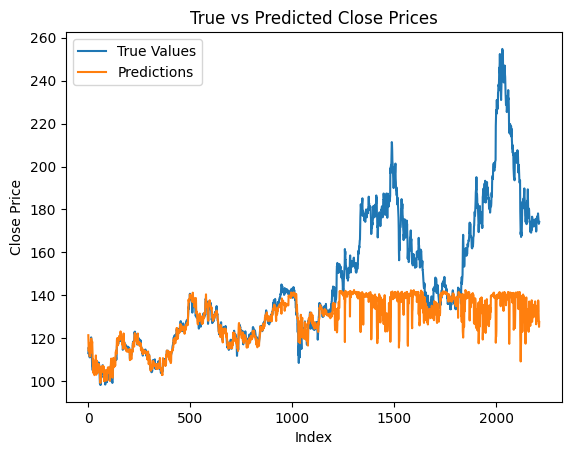

In [48]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame, already sorted by date (oldest to newest)

# Select features and target
features = ['Adj Close', 'High', 'Low', 'Open', 'Volume', 'DayOfWeek', 'Month',
            'Lag_1', 'Lag_5', 'Rolling_Mean_5', 'Rolling_Std_5', 'Target']
target = 'Close'

X = data_random[features]
y = data_random[target]

# Step 1: Scaling the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Apply PCA
pca = PCA(n_components=11)  # Adjust the number of components if needed
X_pca = pca.fit_transform(X_scaled)

# Step 3: Time-Series Split (80% train, 20% test)
split_index = int(len(X_pca) * 0.8)  # 80% for training
X_train, X_test = X_pca[:split_index], X_pca[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Step 4: Train RandomForest Model
model = RandomForestRegressor(n_estimators=500, max_depth=10, random_state=42)
model.fit(X_train, y_train)

# Step 5: Make Predictions for the Test Set
y_pred = model.predict(X_test)

# Step 6: Evaluate the Model Performance
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Step 7: Predicting for the Next 5 Days
X_latest = X_pca[-1].reshape(1, -1)  # Use the last available data point
future_predictions = []

for i in range(5):
    prediction = model.predict(X_latest)
    future_predictions.append(prediction[0])
    
    # Simulate updating features for the next day
    X_latest[0, 0] = prediction  # You may need a better updating strategy

print("Predicted 'Close' prices for the next 5 days:", future_predictions)

# Optional: Plotting the results
plt.plot(range(len(y_test)), y_test, label="True Values")
plt.plot(range(len(y_test)), y_pred, label="Predictions")
plt.title("True vs Predicted Close Prices")
plt.xlabel("Index")
plt.ylabel("Close Price")
plt.legend()
plt.show()


In [42]:
data = data.fillna(-1)

Mean Absolute Error (MAE): 1.284221477490645
Root Mean Squared Error (RMSE): 2.4917927728769937
Predicted 'Close' prices for the next 5 days: [196.45294, 232.21692, 232.21692, 232.21692, 232.21692]


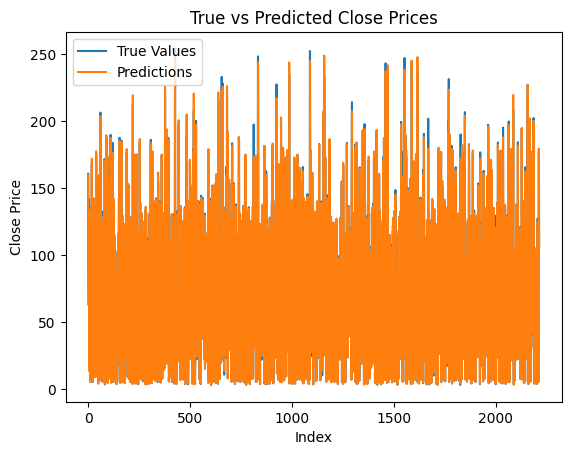

In [49]:
# import numpy as np
# import pandas as pd
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split
# from xgboost import XGBRegressor
# from sklearn.metrics import mean_absolute_error, mean_squared_error
# import matplotlib.pyplot as plt

# # Assuming 'data' is your DataFrame, and you have already engineered the relevant features.

# # Select features and target
# features = ['Adj Close', 'High', 'Low', 'Open', 'Volume', 'DayOfWeek', 'Month',
#             'Lag_1', 'Lag_5', 'Rolling_Mean_5', 'Rolling_Std_5','Target']
# target = 'Close'

# X = data[features]
# y = data[target]

# # Step 1: Scaling the features using StandardScaler
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Step 2: Apply PCA
# pca = PCA(n_components=5)  # You can adjust the number of components if needed
# X_pca = pca.fit_transform(X_scaled)

# # Step 3: Split the data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# # Step 4: Train XGBoost Model
# model = XGBRegressor(n_estimators=1000, learning_rate=0.05, max_depth=3)
# model.fit(X_train, y_train)

# # Step 5: Make Predictions for the Test Set
# y_pred = model.predict(X_test)

# # Step 6: Evaluate the Model Performance
# mae = mean_absolute_error(y_test, y_pred)
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# print(f'Mean Absolute Error (MAE): {mae}')
# print(f'Root Mean Squared Error (RMSE): {rmse}')

# # Step 7: Predicting for the Next 5 Days (use the most recent data for this)
# # Assuming that the last row of data is the most recent trading day
# X_latest = data[features].iloc[-1].values.reshape(1, -1)
# X_latest_scaled = scaler.transform(X_latest)
# X_latest_pca = pca.transform(X_latest_scaled)

# # Predict for the next 5 days
# future_predictions = []
# for i in range(5):
#     prediction = model.predict(X_latest_pca)
#     future_predictions.append(prediction[0])
    
#     # Update X_latest for the next day (here we simulate the next trading day with previous predictions)
#     X_latest_pca[0, 0] = prediction  # Update one of the features (you can customize this logic)

# print("Predicted 'Close' prices for the next 5 days:", future_predictions)

# # Optional: Plotting the results
# plt.plot(range(len(y_test)), y_test, label="True Values")
# plt.plot(range(len(y_test)), y_pred, label="Predictions")
# plt.title("True vs Predicted Close Prices")
# plt.xlabel("Index")
# plt.ylabel("Close Price")
# plt.legend()
# plt.show()


In [171]:
data_random.columns

Index(['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume',
       'DayOfWeek', 'Month', 'Lag_1', 'Lag_5', 'Rolling_Mean_5',
       'Rolling_Std_5', 'Target'],
      dtype='object')

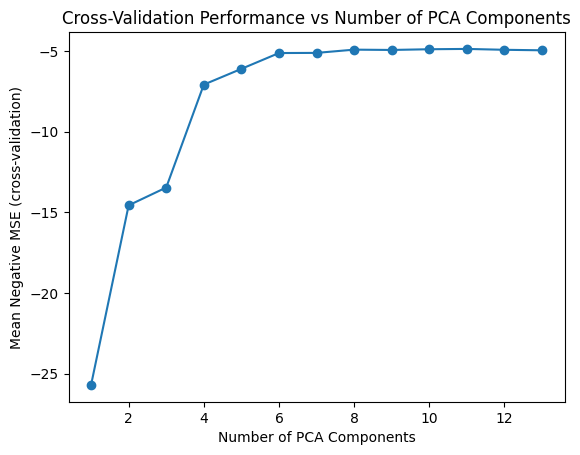

Optimal number of components: 11
MAE: 0.7736921942385808
RMSE: 1.3521423606853828


In [45]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming 'data_random' is your DataFrame and 'Close' is the target column

# Convert 'Date' column to features (e.g., day, month, year) if necessary, or drop it
data_random['DayOfWeek'] = data_random['Date'].dt.dayofweek  # Day of the week (0=Monday, 6=Sunday)
data_random['Month'] = data_random['Date'].dt.month  # Month (1=January, 12=December)
data_random['Year'] = data_random['Date'].dt.year  # Year

# Drop the 'Date' column now that it's transformed into features
data_random = data_random.drop(columns=['Date'])

# Handle missing values (e.g., use median to fill missing values)
data_random = data_random.fillna(data_random.median())

# Extract the features and target
X = data_random.drop(columns=['Close'])
y = data_random['Close']

# Scale the features (PCA is affected by the scale of data)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Range of components to test
components_range = range(1, X_scaled.shape[1] + 1)

# Store the cross-validation scores
cv_scores = []

# Loop over the number of components and apply PCA
for n_components in components_range:
    # Apply PCA
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
    
    # Train a model (e.g., RandomForestRegressor or XGBoost)
    model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can replace this with XGBoost
    model.fit(X_train, y_train)
    
    # Evaluate the model using cross-validation and store the score
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_scores.append(np.mean(scores))  # Store the mean of the cross-validation scores

# Plot the cross-validation scores vs number of components
plt.plot(components_range, cv_scores, marker='o')
plt.xlabel('Number of PCA Components')
plt.ylabel('Mean Negative MSE (cross-validation)')
plt.title('Cross-Validation Performance vs Number of PCA Components')
plt.show()

# Find the optimal number of components (highest score)
optimal_components = components_range[np.argmax(cv_scores)]
print(f"Optimal number of components: {optimal_components}")

# Final model training with the optimal number of components
pca = PCA(n_components=optimal_components)
X_pca = pca.fit_transform(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")


In [114]:
data.fillna(-1,inplace=True)

In [115]:
data.isnull().sum()

Adj Close         0
Close             0
High              0
Low               0
Open              0
Volume            0
DayOfWeek         0
Month             0
Lag_1             0
Lag_5             0
Rolling_Mean_5    0
Rolling_Std_5     0
Target            0
dtype: int64

# XGBoost

In [32]:
import pandas as pd
import numpy as np

# Assuming `data` is your DataFrame containing stock data with the relevant columns

# Ensure the 'Date' column is in datetime format
data['Date'] = pd.to_datetime(data['Date'])

# 1. Extract time-based features from 'Date'
data['DayOfWeek'] = data['Date'].dt.dayofweek  # Monday=0, Sunday=6
data['Month'] = data['Date'].dt.month  # Month (1-12)
data['IsWeekend'] = data['DayOfWeek'].isin([5, 6])  # Identify weekends (Saturday=5, Sunday=6)

# 2. Open-Close Difference
data['OpenCloseDiff'] = data['Open'] - data['Close']

# 3. Gap-up/Gap-down: Difference between opening price and previous day's close
data['PrevClose'] = data['Close'].shift(1)  # Get previous day's close price
data['GapUp'] = np.where(data['Open'] > data['PrevClose'], 1, 0)  # 1 if gap-up, 0 if no gap
data['GapDown'] = np.where(data['Open'] < data['PrevClose'], 1, 0)  # 1 if gap-down, 0 if no gap

# 4. High-Low Range: Difference between highest and lowest prices of the day
data['HighLowRange'] = data['High'] - data['Low']

# 5. Low-Close Difference: Difference between lowest price and closing price of the day
data['LowCloseDiff'] = data['Low'] - data['Close']

# 6. Moving Averages: 10-day and 50-day moving averages of the closing price
data['MA_10'] = data['Close'].rolling(window=10).mean()  # 10-day moving average
data['MA_50'] = data['Close'].rolling(window=50).mean()  # 50-day moving average

# 7. Daily Return: (Close_today - Close_yesterday) / Close_yesterday
data['DailyReturn'] = data['Close'].pct_change()  # Percentage change in closing price

# 8. Volume-based features:
# Volume spike detection: Identify if today's volume is more than 1.5 times the average volume of the last 10 days
data['VolumeSpike'] = np.where(data['Volume'] > data['Volume'].rolling(window=10).mean() * 1.5, 1, 0)

# Volume-Weighted Average Price (VWAP): Sum of (Price * Volume) / Total Volume
data['VWAP'] = (data['Close'] * data['Volume']).cumsum() / data['Volume'].cumsum()

# Drop the first row because it has NaN values after calculating changes and rolling features
data = data.dropna()

# Preview the new features added
print(data.head())


    Unnamed: 0       Date  Adj Close     Close      High       Low  Open  \
49          49 1980-05-27   2.800973  4.013692  4.067208  4.013692   0.0   
50          50 1980-05-28   2.763627  3.960176  4.013692  3.960176   0.0   
52          52 1980-05-30   2.754290  3.946797  4.000313  3.946797   0.0   
53          53 1980-06-02   2.763627  3.960176  4.013692  3.960176   0.0   
54          54 1980-06-03   2.763627  3.960176  4.013692  3.960176   0.0   

     Volume  DayOfWeek  Month  ...  PrevClose  GapUp  GapDown  HighLowRange  \
49   5606.0        1.0    5.0  ...   3.973555      0        1      0.053516   
50   4672.0        2.0    5.0  ...   4.013692      0        1      0.053516   
52   6540.0        4.0    5.0  ...   3.960176      0        1      0.053516   
53    934.0        0.0    6.0  ...   3.946797      0        1      0.053516   
54  18686.0        1.0    6.0  ...   3.960176      0        1      0.053516   

    LowCloseDiff     MA_10     MA_50  DailyReturn  VolumeSpike      

/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
<ipython-input-32-baedb79f203b>:33: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  data['DailyReturn'] = data['Close'].pct_change()  # Percentage change in closing price
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


In [33]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 5848 entries, 49 to 11290
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Unnamed: 0     5848 non-null   int64         
 1   Date           5848 non-null   datetime64[ns]
 2   Adj Close      5848 non-null   float64       
 3   Close          5848 non-null   float64       
 4   High           5848 non-null   float64       
 5   Low            5848 non-null   float64       
 6   Open           5848 non-null   float64       
 7   Volume         5848 non-null   float64       
 8   DayOfWeek      5848 non-null   float64       
 9   Month          5848 non-null   float64       
 10  IsWeekend      5848 non-null   bool          
 11  OpenCloseDiff  5848 non-null   float64       
 12  PrevClose      5848 non-null   float64       
 13  GapUp          5848 non-null   int64         
 14  GapDown        5848 non-null   int64         
 15  HighLowRange   5848 non-

In [37]:
data

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,Date,Adj Close,Close,High,Low,Open,Volume,DayOfWeek,Month,IsWeekend,...,GapUp,GapDown,HighLowRange,LowCloseDiff,MA_10,MA_50,DailyReturn,VolumeSpike,VWAP,Target
49,1980-05-27,2.800973,4.013692,4.067208,4.013692,0.000000,5606.0,1,5,False,...,0,0,0.053516,0.000000,NaN,NaN,NaN,0,4.013692,3.973555
50,1980-05-28,2.763627,3.960176,4.013692,3.960176,0.000000,4672.0,2,5,False,...,0,1,0.053516,0.000000,NaN,NaN,-0.013333,0,3.989366,3.973555
52,1980-05-30,2.754290,3.946797,4.000313,3.946797,0.000000,6540.0,4,5,False,...,0,1,0.053516,0.000000,NaN,NaN,-0.003378,0,3.972812,4.000313
53,1980-06-02,2.763627,3.960176,4.013692,3.960176,0.000000,934.0,0,6,False,...,0,1,0.053516,0.000000,NaN,NaN,0.003390,0,3.972147,4.040450
54,1980-06-03,2.763627,3.960176,4.013692,3.960176,0.000000,18686.0,1,6,False,...,0,1,0.053516,0.000000,NaN,NaN,0.000000,0,3.966008,4.053829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11204,2024-08-26,180.570007,180.570007,181.830002,180.389999,180.729996,337400.0,0,8,False,...,0,1,1.440002,-0.180008,179.585999,197.3374,-0.024420,0,99.962336,NaN
11205,2024-08-27,185.750000,185.750000,186.350006,185.250000,185.360001,657300.0,1,8,False,...,1,0,1.100006,-0.500000,181.363998,197.3092,0.028687,1,100.007485,NaN
11288,2024-12-24,181.429993,181.429993,181.720001,180.830002,181.000000,168600.0,1,12,False,...,0,1,0.889999,-0.599991,182.267998,197.1476,-0.023257,0,100.018475,NaN
11289,2024-12-26,197.360001,197.360001,198.000000,193.130005,195.970001,1281200.0,3,12,False,...,1,0,4.869995,-4.229996,184.302998,197.2992,0.087803,1,100.118216,NaN


/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)


Mean Absolute Error (MAE): 16.21293194424942
Root Mean Squared Error (RMSE): 26.55413855060728


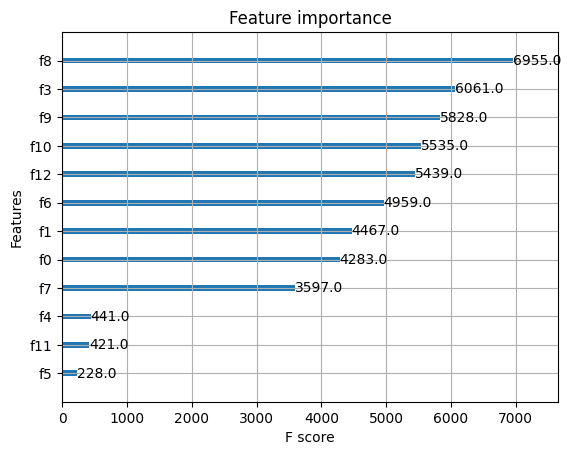

In [38]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming your dataset is loaded into 'data'
# Drop irrelevant column
# data = data.drop(columns=['Unnamed: 0'])

# Ensure the 'Date' column is in datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Handle missing values (forward fill or interpolation)
# data = data.fillna(method='ffill')  # Alternatively, you can use data.interpolate()

# Feature Engineering (add the relevant features from earlier)
data['DayOfWeek'] = data['Date'].dt.dayofweek
data['Month'] = data['Date'].dt.month
data['IsWeekend'] = data['DayOfWeek'].isin([5, 6])
data['OpenCloseDiff'] = data['Open'] - data['Close']
data['PrevClose'] = data['Close'].shift(1)
data['GapUp'] = np.where(data['Open'] > data['PrevClose'], 1, 0)
data['GapDown'] = np.where(data['Open'] < data['PrevClose'], 1, 0)
data['HighLowRange'] = data['High'] - data['Low']
data['LowCloseDiff'] = data['Low'] - data['Close']
data['MA_10'] = data['Close'].rolling(window=10).mean()
data['MA_50'] = data['Close'].rolling(window=50).mean()
data['DailyReturn'] = data['Close'].pct_change()
data['VolumeSpike'] = np.where(data['Volume'] > data['Volume'].rolling(window=10).mean() * 1.5, 1, 0)
data['VWAP'] = (data['Close'] * data['Volume']).cumsum() / data['Volume'].cumsum()

# Shift the closing price to create the target variable (5 days ahead)
data['Target'] = data['Close'].shift(-5)

# Drop the first 5 rows because they will have NaN values in the target
data = data.dropna()

# Features (select features for training)
features = ['DayOfWeek', 'Month', 'IsWeekend', 'OpenCloseDiff', 'GapUp', 'GapDown', 'HighLowRange', 
            'LowCloseDiff', 'MA_10', 'MA_50', 'DailyReturn', 'VolumeSpike', 'VWAP']

X = data[features]

# Target variable
y = data['Target']

# Train-test split (80% train, 20% test)
train_size = int(len(data) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Scaling features (optional but can improve performance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the XGBoost model
model = XGBRegressor(n_estimators=1000, learning_rate=0.05, max_depth=6, random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Feature Importance Plot
import xgboost as xgb
xgb.plot_importance(model)
plt.show()


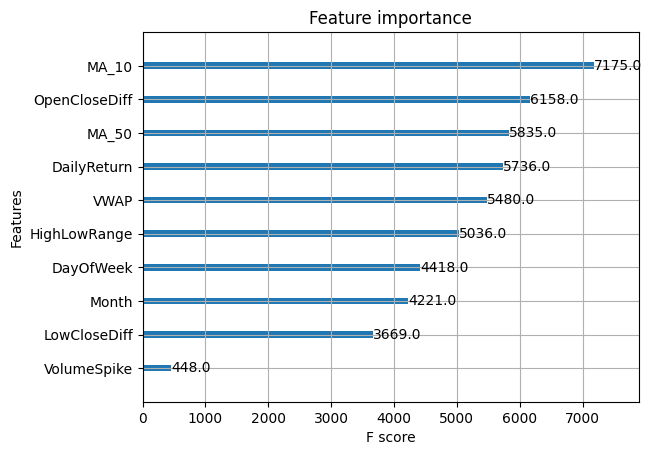

In [40]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Example DataFrame with feature names
features = ['DayOfWeek', 'Month', 'IsWeekend', 'OpenCloseDiff', 'GapUp', 'GapDown', 
            'HighLowRange', 'LowCloseDiff', 'MA_10', 'MA_50', 'DailyReturn', 'VolumeSpike', 'VWAP']

# Assuming 'data' is your DataFrame with features and 'Target' column
X = data[features]
y = data['Target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train XGBoost model
model = xgb.XGBRegressor(n_estimators=1000, learning_rate=0.05, max_depth=6, random_state=42)
model.fit(X_train, y_train)

# Plot Feature Importance with feature names
xgb.plot_importance(model, importance_type='weight', max_num_features=10)
plt.show()


### Tuning the hyperparameters

In [ ]:
import warnings

warnings.filterwarnings('ignore')

Fitting 3 folds for each of 243 candidates, totalling 729 fits


<ipython-input-45-9140e61747f6>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DayOfWeek'] = data['Date'].dt.dayofweek
<ipython-input-45-9140e61747f6>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Month'] = data['Date'].dt.month
<ipython-input-45-9140e61747f6>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

Best hyperparameters: {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.9}
Mean Absolute Error (MAE): 15.272907144139229
Root Mean Squared Error (RMSE): 25.69016906026066


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

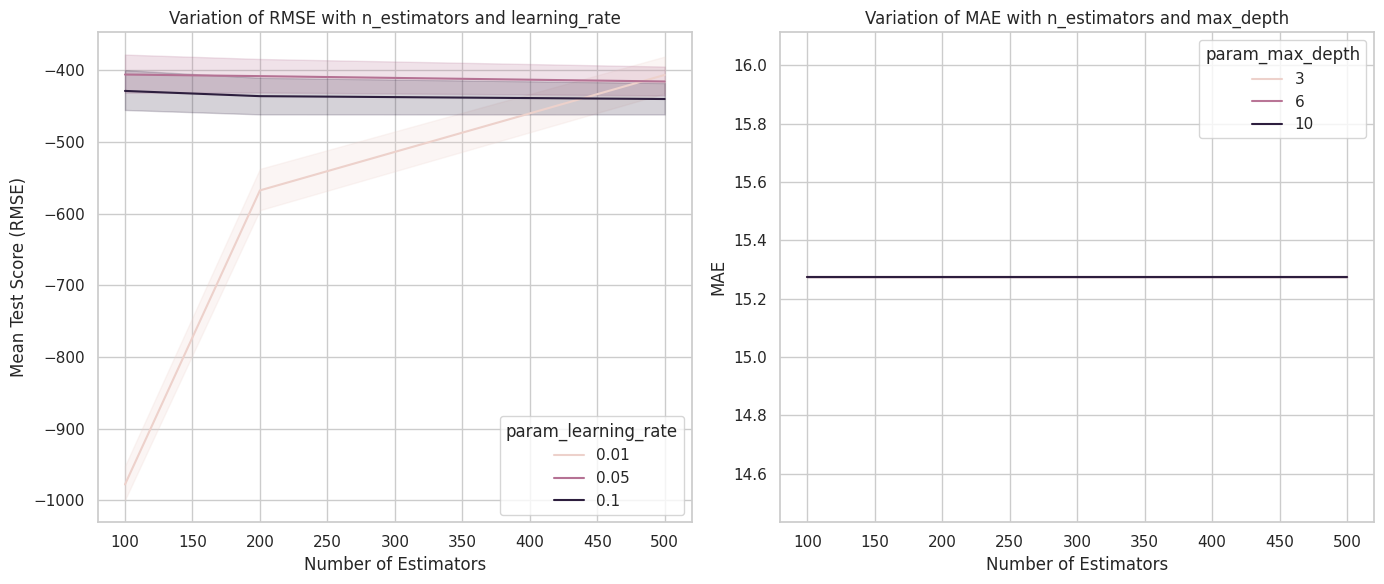

In [45]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming your dataset is loaded into 'data' and preprocessed as before

# Feature Engineering (add the relevant features from earlier)
data['DayOfWeek'] = data['Date'].dt.dayofweek
data['Month'] = data['Date'].dt.month
data['IsWeekend'] = data['DayOfWeek'].isin([5, 6])
data['OpenCloseDiff'] = data['Open'] - data['Close']
data['PrevClose'] = data['Close'].shift(1)
data['GapUp'] = np.where(data['Open'] > data['PrevClose'], 1, 0)
data['GapDown'] = np.where(data['Open'] < data['PrevClose'], 1, 0)
data['HighLowRange'] = data['High'] - data['Low']
data['LowCloseDiff'] = data['Low'] - data['Close']
data['MA_10'] = data['Close'].rolling(window=10).mean()
data['MA_50'] = data['Close'].rolling(window=50).mean()
data['DailyReturn'] = data['Close'].pct_change()
data['VolumeSpike'] = np.where(data['Volume'] > data['Volume'].rolling(window=10).mean() * 1.5, 1, 0)
data['VWAP'] = (data['Close'] * data['Volume']).cumsum() / data['Volume'].cumsum()

# Shift the closing price to create the target variable (5 days ahead)
data['Target'] = data['Close'].shift(-5)
data = data.dropna()

# Features (select features for training)
features = ['DayOfWeek', 'Month', 'IsWeekend', 'OpenCloseDiff', 'GapUp', 'GapDown', 'HighLowRange', 'LowCloseDiff', 'MA_10', 'MA_50', 'DailyReturn', 'VolumeSpike', 'VWAP']
X = data[features]
y = data['Target']

# Train-test split (80% train, 20% test)
train_size = int(len(data) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Scaling features (optional but can improve performance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define hyperparameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 500], 
    'learning_rate': [0.01, 0.05, 0.1], 
    'max_depth': [3, 6, 10],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(XGBRegressor(random_state=42), param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search.fit(X_train_scaled, y_train)

# Best hyperparameters from grid search
print(f"Best hyperparameters: {grid_search.best_params_}")

# Make predictions with the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# Evaluate the model using RMSE and MAE
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Collect RMSE and MAE for each parameter set to plot
results = pd.DataFrame(grid_search.cv_results_)

# Plot RMSE and MAE against hyperparameter variations
plt.figure(figsize=(14, 6))

# RMSE plot
plt.subplot(1, 2, 1)
sns.lineplot(data=results, x='param_n_estimators', y='mean_test_score', hue='param_learning_rate')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Test Score (RMSE)')
plt.title('Variation of RMSE with n_estimators and learning_rate')

# MAE plot
plt.subplot(1, 2, 2)
mae_scores = results.apply(lambda row: mean_absolute_error(y_test, best_model.predict(X_test_scaled)), axis=1)
sns.lineplot(data=results, x='param_n_estimators', y=mae_scores, hue='param_max_depth')
plt.xlabel('Number of Estimators')
plt.ylabel('MAE')
plt.title('Variation of MAE with n_estimators and max_depth')

plt.tight_layout()
plt.show()
